In [12]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.parse import quote
import math

In [13]:
driver = webdriver.Chrome('../05_crawling/chromedriver')
search = quote('남친 크리스마스 선물')
kin_url = 'https://kin.naver.com/search/list.nhn'



개별적으로 돌려보기¶

In [14]:
url = f'{kin_url}?query={search}&page=1'
driver.get(url)
time.sleep(1)

ul = driver.find_element_by_css_selector('.basic1')
lis = ul.find_elements_by_tag_name('li')
ans_href_list = []
for li in lis:
    atag = li.find_element_by_tag_name('a')
    ans_href = atag.get_attribute('href')
    ans_href_list.append(ans_href)

In [15]:
driver.get(ans_href_list[0])
time.sleep(1)
count = int(driver.find_element_by_css_selector('._answerCount.num').text)
count

9

In [16]:
for next in range(math.floor((count-1)/5)):
    more = driver.find_element_by_id('nextPageButton')
    more.click()
    time.sleep(1)

In [17]:
answers = driver.find_elements_by_css_selector('._endContentsText.c-heading-answer__content-user')
for i, answer in enumerate(answers):
    print(f'{i}==================================================')
    print(answer.text)

0==================================================
와우 깔창은 자존심을 건드는 걸 수도 있기 때문에 머플러 추천합니다!
1==================================================
안녕하세요, 저희는 tvN 호캉스 리얼리티 여름방학에서 정유미님, 최우식님, 박서준님 등 여러 연예인분들 통해서 최신 유행 아이템으로 소개된 후, 국내에 똑딱이 마스크스트랩을 상용화 시킨 와우맘입니다.
와우맘 마스크스트랩은 종류와 색상 그리고 마스크 스트랩별로 개성과 컨셉이 달라서 캐주얼룩, 오피스룩, 데일리룩, 포멀룩에 다 잘어울리고 전 연령대에 안성맞춤 선물입니다! 
마스크스트랩 말고도 망토 담요, 웰컴키트, 위생키트 등 선물 할 것들이 많이 있고 앞으로도 많은 상품들을 준비 할 예정입니다. 
링크 클릭하셔서 한번 보고가세요~! 감사합니다!
[와우맘 - 홈]
국내 최고의 핸드메이드 마스크스트랩 마스크목걸이
wowmomstrap.modoo.at
2==================================================
자바라 거치대 침대 핸드폰 거치대 스마트폰 아이폰 아이패드 갤럭시 태블릿 학다리 코브라
oneany.shop
핸드폰 거치대 어떨까요??
남친이 좋아할거같아요!!
가격도 착하고.
링크걸어드릴게요,
선물받으면
좋아하겠네요!!!
강력 추천합니다.
지금바로 주문해보세요~
맘에 들었다면 
채택 꾹~~해쥬세요~~~~
이글은 에드픽이 추천한 제품의 이용후기가 포함되어있으며 작성자에게 수수료가 지급됩니다
3==================================================
안녕하세요.
바디필로우 어떨까요?
저렴하면서 실용적이기도 하구요.
https://coupa.ng/bNqfuk
바나나리빙 쫀득 마약바디필로우 마이크로에어볼 U자
COUPANG
coupa.ng
예쁜 무드등도 추천드려요.
얼마전 지인 집들이에 선물했는데 무척 좋아하더라구요.
https://coupa.ng

1 ~ 10 페이지 한꺼번에 돌리기

In [18]:
xmas_gift_text = ''
for page in range(1,11):
    url = f'{kin_url}?query={search}&page={page}'
    driver.get(url)
    print(page, end=' ')
    time.sleep(1)

    ul = driver.find_element_by_css_selector('.basic1')
    lis = ul.find_elements_by_tag_name('li')

    ans_href_list = []
    for li in lis:
        atag = li.find_element_by_tag_name('a')
        ans_href = atag.get_attribute('href')
        ans_href_list.append(ans_href)
    time.sleep(1)

    for ans_href in ans_href_list:
        driver.get(ans_href)
        time.sleep(1)
        count = int(driver.find_element_by_css_selector('._answerCount.num').text)
        #print(count)
        for next in range(math.floor((count-1)/5)):
            more = driver.find_element_by_id('nextPageButton')
            more.click()
            time.sleep(1)

        answers = driver.find_elements_by_class_name('_endContentsText.c-heading-answer__content-user')
        for answer in answers:
            #print('#', sep='', end='')
            xmas_gift_text += '\n' + answer.text
        #print()
        time.sleep(1)

1 2 3 4 5 6 7 8 9 10 

In [19]:
file = open('./results/xmas_gift.txt', 'w', encoding='utf-8')
file.write(xmas_gift_text)
file.close()

명사 추출하기

In [20]:
gift_text = open('./results/xmas_gift.txt', encoding='utf-8').read()

In [21]:
from konlpy.tag import Okt
okt = Okt()

In [24]:
tokens = okt.nouns(xmas_gift_text)
tokens[:10]

['와우', '깔창', '자존심', '건', '걸', '수도', '때문', '머플러', '추천', '저희']

In [25]:
# 영문자, 숫자 제거
import re
new_gift_text = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]', '', token)
    new_gift_text.append(text)

In [26]:
new_gift_text[:10]

['와우', '깔창', '자존심', '건', '걸', '수도', '때문', '머플러', '추천', '저희']

In [27]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

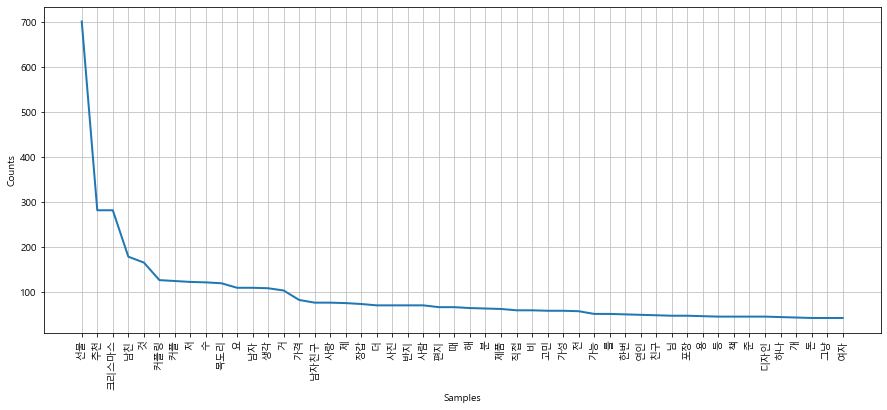

In [28]:
import nltk
gf_gift = nltk.Text(new_gift_text, name='남친 크리스마스 선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [64]:
stop_words = ['선물','추천','것','가격','여친','제품','여자친구','제','요','더','고급', '크리스마스','것','커플','저','수','요','남자','거','사랑','제','더','사람','분','제품','직접','비','고민','가성','전','가능','를','한번','연인','친구','님','포장','용','등','준','하나','그냥','와우','자존심','건','걸','수도','저희','리얼리티','호캉스','여름방학','정유미','최우식','박서준','여러','연예인','통해','최신','유행','아이템','소개','후','국내','똑','상용', '맘',  '마스크', '스트랩', '종류','종류', '별로', '개성', '컨셉', '달라', '얼룩', '오피스', '데',
    '판매','때','참고','하나','해','한번','제작','용','준','디자인','거','네이버','사람','일리', '포멀룩', '연령', '안성맞춤', '망토', '담요', '웰컴', '키트',
    '배송','중','정말','후기','감동','위생', '앞', '준비', '예정', '클릭', '홈', '최고', '메이드','자바라', '거치', '침대', '핸드폰', '거치', '스마트폰', '아이폰',
    '커플','가능','저','사랑','생각','사용','개','세대','인기','상품','직접','브랜드','학', '다리', '코브라', '남친','얼마','지인', '집들이', '무척', '파파', '병아리', '무드등','구색', '운동', '홈트', '고진','스텝', '퍼', '투맨', '무난',
    '선택','곳','모양','마감','요즘','오늘','가지','남녀','그냥','위','페이',
    '마음','부담','남자','협찬','전','핸드','의미','변경','도움','색상','아래','포장', '강력', '바로', '주문', '채택', '이용', '포함', '작성자', '수수료',
    '처','조금','꾹', '해쥬세', '이글', '에드픽', '지급', '바디', '필', '로우',
    '하루','정도','처리','보시','심플','가장','여성','때문','정보','볼', '자',
    '독서','주소','쇼핑','링크','이니셜','기념일','실용', '바나', '나리', '빙',
    '헤어','질문','친구','스토어','아주','할인','쫀득', '마약', '마이크로', '에어',
    '스','이면','남','지금','센스', '내셔널', '지오', '그래픽', '스몰','공용','현재','쿠팡','행사','중이','뭘','뭐','물질','소정','폴','나나','남자친구','답변','속','그','음','글','구매','말','줄','일단','주인공','겨울','사이','생일','더욱','방법','자신','이건','정리','등등','나','답변']
new_gift_text = [word for word in new_gift_text if word not in stop_words]
new_gift_text[:10]

['깔창', '머플러', '목걸이', '아이패드', '갤럭시', '태블릿', '자수', '펜', '기모', '초']

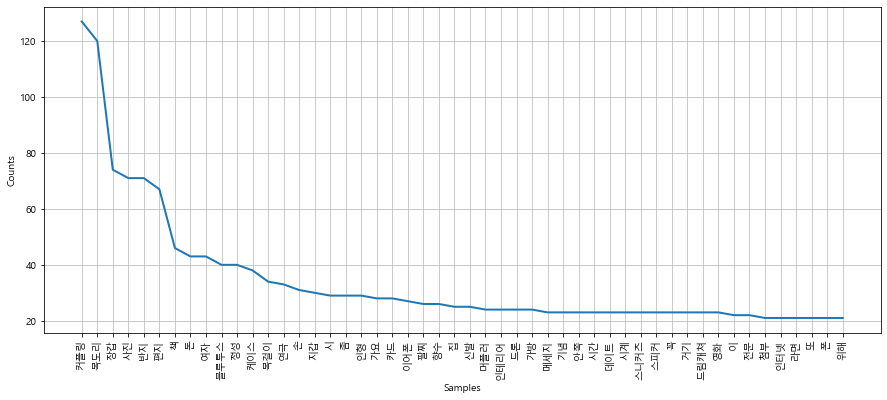

In [65]:
gf_gift = nltk.Text(new_gift_text, name='남친 크리스마스 선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

워드 클라우드 그리기

In [66]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

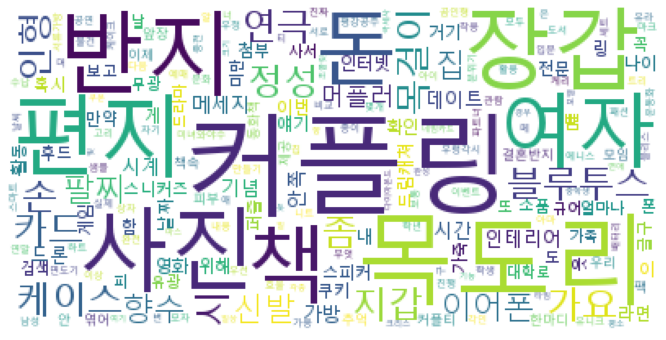

In [75]:
data = gf_gift.vocab().most_common(300)

ta = gf_gift.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [85]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.3, mask=mask,
               background_color = 'white',#'Blue',#'black',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

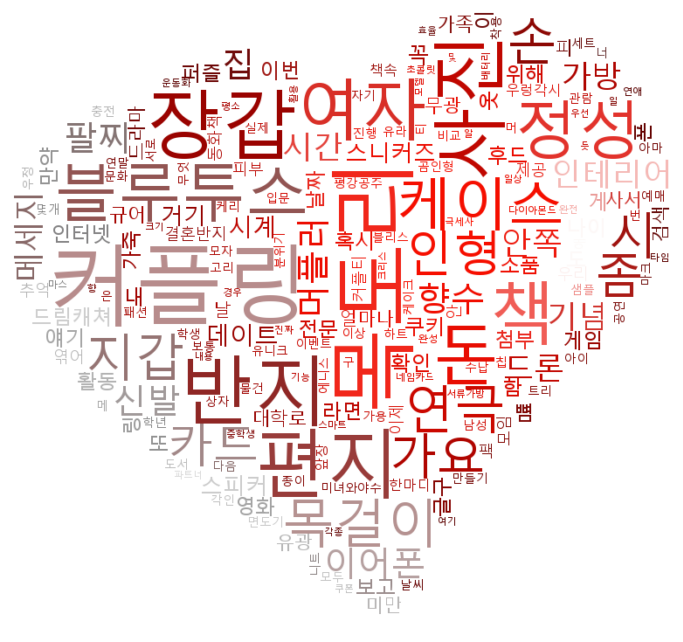

In [86]:

plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()